# Data Processing

The goal is to create a data set with a single (clean) row of values for each date.  If you have 'good' values from all three weather stations, you should use the average of those values; however, you need to be careful not to let the 'bad' data mess up your estimates.  E.g. if there's a missing value, you want to take the average of the two good values (as opposed to adding the two good values and then dividing by three); if there's a clearly mistaken measurement, you likewise don't want to include that in the average.

Note that you need to do this for each of the three temperature columns, TMIN, TMAX, and TAVG.  Once you have created this cleaned version of the data set, you can generate a few simple plots to look at the resulting data, including a line graph that shows how the temperatures (monthly low, high, and average) have evolved over the time period included in the data, and a box plot showing the distribution of the data from each of those three columns.

In [77]:
import pandas as pd # database loading and manipulation library
import numpy as np # numeric python lybrary
import matplotlib.pyplot as plt # plotting and graphing library
#%matplotlib notebook # tell the plotting library we're running an interactive notebook

In [78]:
data = pd.read_csv('temperaturesRaw.csv', parse_dates=['DATE'])

In [3]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-01-01,NaN,NaN,4.69,",,,X",25.9,",X",32.8,",,,X",19.1,",,,X"
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-02-01,NaN,NaN,2.84,",,,X",31.8,",X",40.2,",,,X",23.3,",,,X"
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-03-01,NaN,NaN,3.76,",,,X",43.8,",X",54.5,",,,X",33.2,",,,X"
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-04-01,NaN,NaN,3.93,",,,X",52.0,",X",62.2,",,,X",41.7,",,,X"
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-05-01,NaN,NaN,7.41,",,,0",61.9,",0",71.3,",,,0",52.5,",,,0"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 16 columns):
STATION            3399 non-null object
NAME               3399 non-null object
LATITUDE           3399 non-null float64
LONGITUDE          3399 non-null float64
ELEVATION          3399 non-null float64
DATE               3399 non-null datetime64[ns]
AWND               409 non-null float64
AWND_ATTRIBUTES    409 non-null object
PRCP               3331 non-null float64
PRCP_ATTRIBUTES    3331 non-null object
TAVG               3261 non-null float64
TAVG_ATTRIBUTES    3290 non-null object
TMAX               3285 non-null float64
TMAX_ATTRIBUTES    3315 non-null object
TMIN               3307 non-null float64
TMIN_ATTRIBUTES    3336 non-null object
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 425.0+ KB


In [5]:
data['PRCP'].max()

19.31

### TimeDate objects are flexible
You can treat them as units, but its also easy to pull out the components using properties (see https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components)

In [6]:
data['DATE'][0]

Timestamp('1948-01-01 00:00:00')

In [7]:
print('first row year is', data['DATE'][0].year, 'first row month is', data['DATE'][0].month)

first row year is 1948 first row month is 1




According to the NOAA documentation, AWND is the average wind speed, PRCP is the total precipitation, TAVG is the monthly average temperature, TMIN and TMAX are the monthly min and max temperatures.  The ATTRIBUTES columns give extra information about the associated column.  Full documentation can be found at https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf but for this assignment it's safe to just ignore the ATTRIBUTES columns.

It's fine to drop columns that you're not using for your analysis, particularly if they seem to be distracting and/or not really meaningful in the conjoined version of the data.

# Sort
sorting the data by date 

In [8]:
data.sort_values(by='DATE', ascending=True)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
2198,USC00366927,"PHOENIXVILLE 1 E, PA US",40.12000,-75.50110,32.0,1893-01-01,NaN,NaN,2.62,",,,6",21.1,",6",30.0,",,,6",12.3,",,,6"
841,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-01-01,NaN,NaN,NaN,NaN,21.3,",6",28.5,",,,6",14.1,",,,6"
2199,USC00366927,"PHOENIXVILLE 1 E, PA US",40.12000,-75.50110,32.0,1893-02-01,NaN,NaN,5.54,"1,,,6",30.9,",6",38.7,",,,6",23.2,",,,6"
842,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-02-01,NaN,NaN,6.13,",,,6",30.2,"1,6",38.0,"1,,,6",-84.7,"1,,,6"
843,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-04-01,NaN,NaN,5.02,",,,6",51.7,"5,6",61.7,"2,,,6",-68.2,"3,,,6"
844,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-05-01,NaN,NaN,4.18,",,,6",59.5,",6",69.0,",,,6",50.0,",,,6"
845,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-06-01,NaN,NaN,2.59,",,,6",70.8,"1,6",79.7,",,,6",61.9,"1,,,6"
846,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-07-01,NaN,NaN,NaN,NaN,74.4,",6",83.5,",,,6",65.3,",,,6"
847,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-08-01,NaN,NaN,3.65,",,,6",73.7,",6",83.0,",,,6",64.4,",,,6"
848,USC00369464,"WEST CHESTER 2 NW, PA US",39.97080,-75.63500,114.3,1893-09-01,NaN,NaN,2.58,",,,6",64.1,",6",72.9,",,,6",55.3,",,,6"


Now we need to calculate total sum of readings for each date by different stations and 
their calculated average.
For this we need to calculate the sum of temperature readings on each month made by different stations. Looking at the description of data, AWND values are only present 409 of the times, missing almost 88% of the time 
Lets see if average wind speed affects the temperature readings

In [9]:
data['AWND'].unique()

array([ nan,  6.3,  9.8, 11.4,  8.3,  8.1,  7.4,  7.2,  8.9, 10.3, 11.2,
        9.2,  7.8,  9.6, 10.1,  8.5,  9.4, 10.5,  8.7, 11.9, 11. , 12.8,
       10.7, 12.5, 13. , 13.6, 11.6,  6.7,  6.9,  5.8,  7.6, 13.4, 12.3,
       12.1,  6.5])

Make a scatterplot for AWND and TAVG and see if we can find some relation

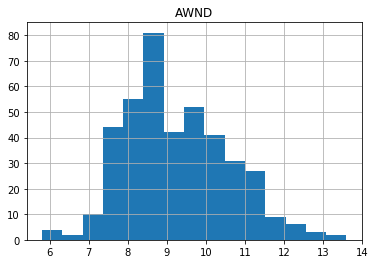

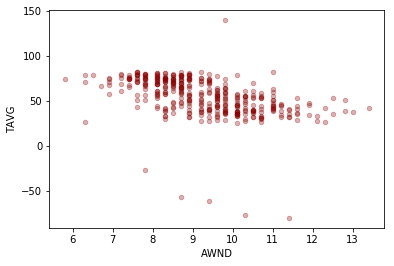

In [10]:
data.hist(column='AWND', bins=15)
data.plot.scatter(x = 'AWND', y = 'TAVG', color ='darkred', alpha=0.3)

From looking at these plots, it seems like most of the avegare temp are between 0 and 100 and 
no any distinct relation can be found between these values, so we are better of dropping 
AWND since it has no co-relation with the average temp. and also most of the values are missing

Lets find the total weather stations we have

In [11]:
data= data.drop(['AWND'], axis=1)
data['STATION'].unique()

array(['USW00013739', 'USC00369464', 'USC00366927'], dtype=object)

In [12]:
data.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,3399.000000,3399.000000,3399.000000,3331.000000,3261.000000,3285.000000,3307.000000
mean,39.999387,-75.486684,57.681701,3.711333,53.549586,63.490594,43.334986
std,0.096978,0.159928,47.469286,2.065311,19.027916,19.652024,18.414772
min,39.873270,-75.635000,3.000000,0.020000,-84.900000,-71.700000,-88.700000
25%,39.970800,-75.635000,32.000000,2.245000,38.600000,47.800000,29.600000
50%,39.970800,-75.501100,32.000000,3.340000,53.900000,65.100000,42.600000
75%,40.120000,-75.501100,114.300000,4.810000,69.300000,80.300000,58.200000
max,40.120000,-75.226780,114.300000,19.310000,185.900000,201.400000,185.700000


looks like we have some missing values for PRCP, TAVG, TMAX and TMIN
also looking at the decription there are some odd values for min TMAX, TMIN and TAVG and max TMAX, TMIN and TAV
try to find out if we see some relation with the elevation and average temp. values
finding the unique values for elevation

In [13]:
data['ELEVATION'].unique()

array([  3. , 114.3,  32. ])

see if we can find any relationship between elevation and average temp. readings

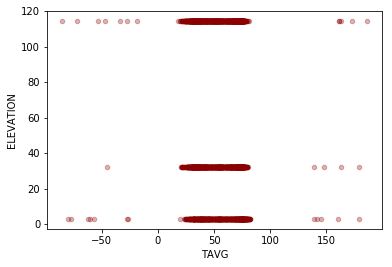

In [14]:
data.plot.scatter(x = 'TAVG', y = 'ELEVATION', color ='darkred', alpha=0.3)

Again we can't find any clear relationship between the temp. and elevation since the stations are not 
located in relatively different elevations from each other

In [15]:
data= data.drop(['ELEVATION'], axis=1)

We can identify the temp. readings using the STATION only so we don't really need the NAME, LATITUDE AND LOGITUDE columns here as well

In [16]:
toDrop = ['NAME', 'LATITUDE', 'LONGITUDE']
data = data.drop(toDrop, axis=1)

In [17]:
data

,STATION,DATE,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013739,1948-01-01,NaN,4.69,",,,X",25.9,",X",32.8,",,,X",19.1,",,,X"
1,USW00013739,1948-02-01,NaN,2.84,",,,X",31.8,",X",40.2,",,,X",23.3,",,,X"
2,USW00013739,1948-03-01,NaN,3.76,",,,X",43.8,",X",54.5,",,,X",33.2,",,,X"
3,USW00013739,1948-04-01,NaN,3.93,",,,X",52.0,",X",62.2,",,,X",41.7,",,,X"
4,USW00013739,1948-05-01,NaN,7.41,",,,0",61.9,",0",71.3,",,,0",52.5,",,,0"
5,USW00013739,1948-06-01,NaN,4.94,",,,0",71.1,",0",81.2,",,,0",61.0,",,,0"
6,USW00013739,1948-07-01,NaN,1.90,",,,0",76.4,",0",85.9,",,,0",66.8,",,,0"
7,USW00013739,1948-08-01,NaN,5.96,",,,0",74.6,",0",83.9,",,,0",65.3,",,,0"
8,USW00013739,1948-09-01,NaN,2.09,",,,0",67.7,",0",78.4,",,,0",57.0,",,,0"
9,USW00013739,1948-10-01,NaN,1.53,",,,0",55.2,",0",64.0,",,,0",46.5,",,,0"


Lets also drop the attributes which are not of any significant help

In [18]:
attributes = ['AWND_ATTRIBUTES', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES']
data = data.drop(attributes, axis =1)

In [19]:
data.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00013739,1948-01-01,4.69,25.9,32.8,19.1
1,USW00013739,1948-02-01,2.84,31.8,40.2,23.3
2,USW00013739,1948-03-01,3.76,43.8,54.5,33.2
3,USW00013739,1948-04-01,3.93,52.0,62.2,41.7
4,USW00013739,1948-05-01,7.41,61.9,71.3,52.5


Our data looks pretty clean and we can add values to our cleaned table now

In [20]:
cleaned = data

In [21]:
cleaned.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00013739,1948-01-01,4.69,25.9,32.8,19.1
1,USW00013739,1948-02-01,2.84,31.8,40.2,23.3
2,USW00013739,1948-03-01,3.76,43.8,54.5,33.2
3,USW00013739,1948-04-01,3.93,52.0,62.2,41.7
4,USW00013739,1948-05-01,7.41,61.9,71.3,52.5


Adding new columns to our new table

In [22]:
cleaned['NewTAVG'] = 'default'
cleaned['NewTMAX'] = 'default'
cleaned['NewTMIN'] = 'default'

In [73]:
cleaned = cleaned.sort_values(by='DATE', ascending=True)


We need to now average multiple temp. readings for each month
since we have NaN values as well for the temp. readings,lets see if our average is being affected by
NaN values

In [24]:
cleaned[cleaned['DATE'] == '2017-02-01']

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
2195,USC00369464,2017-02-01,1.90,39.0,51.2,26.8,default,default,default
3389,USC00366927,2017-02-01,1.37,41.3,52.2,30.4,default,default,default
829,USW00013739,2017-02-01,1.30,NaN,53.5,34.9,default,default,default


In [25]:
sum =0
mask = cleaned['DATE'] == '2017-02-01'
value = cleaned.loc[mask, 'TAVG']
sum = value.sum()

In [26]:
sum

80.3

In [27]:
count = value.count()
count

2

In [28]:
average = sum/count
average

40.15

Here the NaN value is not counted while findind the average of those three readings for TAVG
So looks like we don't have to worry for NaN values while finding the average

We also dont want to include the mistaken measurements in our average as well

Lets see how many mistaken measurements are there in our data

Suppose range for correct values are only between -5 and 110 since the readings looks like to be in Fahrenheit. 
.We choose this range because the temperature beyond this range can be lethal for human beings. So if the readings show temperatures out of this range, those values must be miskenly measured.

In [29]:
cleaned[(cleaned['TAVG'] > 110) | (cleaned['TAVG'] < -5)]

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
1059,USC00369464,1911-05-01,1.17,172.4,79.6,55.2,default,default,default
1113,USC00369464,1916-09-01,3.62,162.6,77.7,55.5,default,default,default
2290,USC00366927,1921-03-01,1.52,148.0,67.2,36.7,default,default,default
1237,USC00369464,1927-09-01,3.21,160.8,76.6,55.0,default,default,default
2409,USC00366927,1931-06-01,3.46,179.3,87.1,59.4,default,default,default
1284,USC00369464,1931-09-01,1.56,-33.8,79.3,63.0,default,default,default
1339,USC00369464,1936-05-01,2.12,-53.6,76.3,50.6,default,default,default
1444,USC00369464,1945-02-01,3.13,-84.9,40.8,25.4,default,default,default
1486,USC00369464,1948-08-01,4.11,-27.3,84.0,63.4,default,default,default
41,USW00013739,1951-06-01,4.18,-26.8,80.5,62.0,default,default,default


In [30]:
cleaned[(cleaned['TMAX'] > 110) | (cleaned['TMAX'] < -5)]

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
862,USC00369464,1894-11-01,2.78,40.9,-62.7,33.5,default,default,default
1097,USC00369464,1915-05-01,NaN,59.2,-31.4,48.9,default,default,default
2300,USC00366927,1922-01-01,1.91,26.0,137.1,17.0,default,default,default
2329,USC00366927,1924-07-01,3.14,73.1,-20.1,62.2,default,default,default
1299,USC00369464,1932-12-01,3.00,37.8,-53.7,30.3,default,default,default
1345,USC00369464,1936-11-01,1.13,41.9,-38.7,32.6,default,default,default
1415,USC00369464,1942-09-01,4.14,67.2,193.3,56.1,default,default,default
1476,USC00369464,1947-10-01,1.08,62.1,-44.7,50.0,default,default,default
2653,USC00366927,1951-12-01,4.43,35.7,-71.7,25.2,default,default,default
47,USW00013739,1951-12-01,5.49,38.6,152.7,30.6,default,default,default


In [31]:
cleaned[(cleaned['TMAX'] > 110) | (cleaned['TMAX'] < -5)]

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
862,USC00369464,1894-11-01,2.78,40.9,-62.7,33.5,default,default,default
1097,USC00369464,1915-05-01,NaN,59.2,-31.4,48.9,default,default,default
2300,USC00366927,1922-01-01,1.91,26.0,137.1,17.0,default,default,default
2329,USC00366927,1924-07-01,3.14,73.1,-20.1,62.2,default,default,default
1299,USC00369464,1932-12-01,3.00,37.8,-53.7,30.3,default,default,default
1345,USC00369464,1936-11-01,1.13,41.9,-38.7,32.6,default,default,default
1415,USC00369464,1942-09-01,4.14,67.2,193.3,56.1,default,default,default
1476,USC00369464,1947-10-01,1.08,62.1,-44.7,50.0,default,default,default
2653,USC00366927,1951-12-01,4.43,35.7,-71.7,25.2,default,default,default
47,USW00013739,1951-12-01,5.49,38.6,152.7,30.6,default,default,default


Looks like we have a plenty of mistaken measurements. Since we don't want to include these values in our
average, we can simply replace them with NaN values so that they don't get treated as a value 
during average calculation

Create new table for removing the mistaken measurements.

In [32]:

newDf = pd.DataFrame(columns=['TAVG', 'TMAX', 'TMIN'])

In [33]:
newDf['TAVG'] = cleaned['TAVG']
newDf['TMAX'] = cleaned['TMAX']
newDf['TMIN'] = cleaned['TMIN']

In [34]:
newDf.head()

,TAVG,TMAX,TMIN
2198,21.1,30.0,12.3
841,21.3,28.5,14.1
2199,30.9,38.7,23.2
842,30.2,38.0,-84.7
843,51.7,61.7,-68.2


Replace all the mistaken measurements with NaN values


In [35]:
newDf.mask((newDf > 110) | (newDf < -5), inplace=True)

Check if the mistaken values are gone

In [36]:
newDf[(newDf['TMAX'] > 110) | (newDf['TMAX'] < -5)]

,TAVG,TMAX,TMIN


In [37]:
newDf[(newDf['TAVG'] > 110) | (newDf['TAVG'] < -5)]

,TAVG,TMAX,TMIN


In [38]:
newDf[(newDf['TMIN'] > 110) | (newDf['TMIN'] < -5)]

,TAVG,TMAX,TMIN


In [39]:
newDf.head()

,TAVG,TMAX,TMIN
2198,21.1,30.0,12.3
841,21.3,28.5,14.1
2199,30.9,38.7,23.2
842,30.2,38.0,NaN
843,51.7,61.7,NaN


We have replaced all the mistaken values with NaN so it wont affect our average calculations.

Now, copy our temperature columns from newDf to cleaned 

In [40]:
cleaned['TAVG'] = newDf['TAVG']
cleaned['TMAX'] = newDf['TMAX']
cleaned['TMIN'] = newDf['TMIN']

In [41]:
cleaned.head()    

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
2198,USC00366927,1893-01-01,2.62,21.1,30.0,12.3,default,default,default
841,USC00369464,1893-01-01,NaN,21.3,28.5,14.1,default,default,default
2199,USC00366927,1893-02-01,5.54,30.9,38.7,23.2,default,default,default
842,USC00369464,1893-02-01,6.13,30.2,38.0,NaN,default,default,default
843,USC00369464,1893-04-01,5.02,51.7,61.7,NaN,default,default,default


In [42]:
uniqueDate = cleaned['DATE'].unique()

In [43]:
type(uniqueDate)

numpy.ndarray

In [44]:
uniqueDate

array(['1893-01-01T00:00:00.000000000', '1893-02-01T00:00:00.000000000',
       '1893-04-01T00:00:00.000000000', ...,
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

Creating table for TAVG, TMAX and TMIN values

In [45]:
TAVG_arr = []

for i in uniqueDate:
    
    mask = cleaned['DATE'] == i
    value = cleaned.loc[mask, 'TAVG']
    sum = value.sum()
    count= value.count()
    average = sum/count
    
    TAVG_arr.append([i, sum, count, average])

/home/kratos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [46]:
TAVGtable = pd.DataFrame()
TAVGtable = pd.DataFrame(TAVG_arr)
TAVGtable.columns= ['DATE','SUM', 'COUNT', 'AVERAGE']


In [74]:
TMAX_arr = []

for i in uniqueDate:
    
    mask = cleaned['DATE'] == i
    value = cleaned.loc[mask, 'TMAX']
    sum = value.sum()
    count= value.count()
    average = sum/count
    
    TMAX_arr.append([i, sum, count, average])
    
TMAXtable = pd.DataFrame()
TMAXtable = pd.DataFrame(TMAX_arr)
TMAXtable.columns= ['DATE','SUM', 'COUNT', 'AVERAGE']


/home/kratos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [75]:
TMIN_arr = []

for i in uniqueDate:
    
    mask = cleaned['DATE'] == i
    value = cleaned.loc[mask, 'TMIN']
    sum = value.sum()
    count= value.count()
    average = sum/count
    
    TMIN_arr.append([i, sum, count, average])
    
TMINtable = pd.DataFrame()
TMINtable = pd.DataFrame(TMIN_arr)
TMINtable.columns= ['DATE','SUM', 'COUNT', 'AVERAGE']


/home/kratos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [49]:
# lets add more columns to our TAVGtable 
TAVGtable['TMAX_AVERAGE'] = TMAXtable['AVERAGE']

In [50]:
TAVGtable.head()

,DATE,SUM,COUNT,AVERAGE,TMAX_AVERAGE
0,1893-01-01,42.4,2,21.20,29.25
1,1893-02-01,61.1,2,30.55,38.35
2,1893-04-01,51.7,1,51.70,61.70
3,1893-05-01,59.5,1,59.50,69.00
4,1893-06-01,70.8,1,70.80,79.70


In [51]:
TAVGtable['TMIN_AVERAGE'] = TMINtable['AVERAGE']

In [53]:
TAVGtable.columns = ['DATE','SUM','COUNT','TAVG_AVERAGE','TMAX_AVERAGE','TMIN_AVERAGE']

In [54]:
TAVGtable.isnull().values.sum()

35

Looks like we still have 35 rows with null values in them.
Since it represents around 2.3% of the whole data which is not a significant amount to skew our data
,we are better off dropping these rows from our data

In [55]:
TAVGtable = TAVGtable.dropna()

In [56]:
TAVGtable.isnull().values.any()

False

In [57]:
TAVGtable.head()

,DATE,SUM,COUNT,TAVG_AVERAGE,TMAX_AVERAGE,TMIN_AVERAGE
0,1893-01-01,42.4,2,21.20,29.25,13.2
1,1893-02-01,61.1,2,30.55,38.35,23.2
3,1893-05-01,59.5,1,59.50,69.00,50.0
4,1893-06-01,70.8,1,70.80,79.70,61.9
5,1893-07-01,74.4,1,74.40,83.50,65.3


In [58]:
FinalTable = TAVGtable.drop(['SUM','COUNT'], axis=1)

In [76]:
FinalTable.head()

,DATE,TAVG_AVERAGE,TMAX_AVERAGE,TMIN_AVERAGE
0,1893-01-01,21.20,29.25,13.2
1,1893-02-01,30.55,38.35,23.2
3,1893-05-01,59.50,69.00,50.0
4,1893-06-01,70.80,79.70,61.9
5,1893-07-01,74.40,83.50,65.3


So our final data looks like this and we are ready to plot it 

(array([686291., 693596., 700900., 708205., 715510., 722815., 730120.,
        737425., 744730.]), <a list of 9 Text xticklabel objects>)

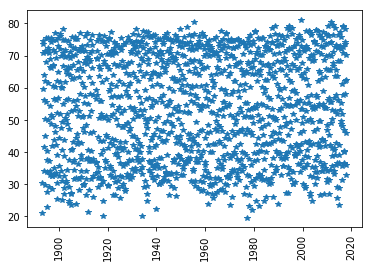

In [60]:
plt.plot(FinalTable['DATE'], FinalTable['TAVG_AVERAGE'], '*')
plt.xticks(rotation='vertical')

(array([686291., 693596., 700900., 708205., 715510., 722815., 730120.,
        737425., 744730.]), <a list of 9 Text xticklabel objects>)

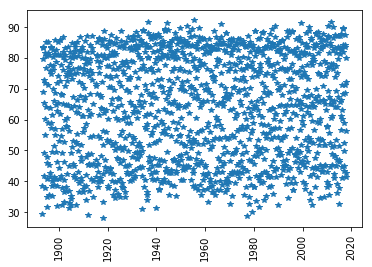

In [61]:
plt.plot(FinalTable['DATE'], FinalTable['TMAX_AVERAGE'], '*')
plt.xticks(rotation='vertical')

(array([686291., 693596., 700900., 708205., 715510., 722815., 730120.,
        737425., 744730.]), <a list of 9 Text xticklabel objects>)

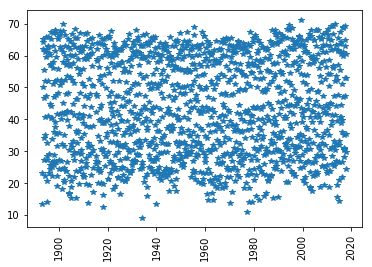

In [62]:
plt.plot(FinalTable['DATE'], FinalTable['TMIN_AVERAGE'], '*')
plt.xticks(rotation='vertical')

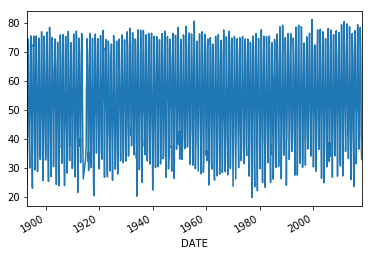

In [63]:
FinalTable.set_index('DATE')['TAVG_AVERAGE'].plot()

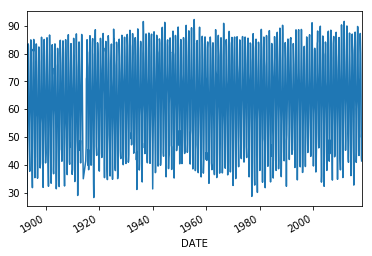

In [64]:
FinalTable.set_index('DATE')['TMAX_AVERAGE'].plot()

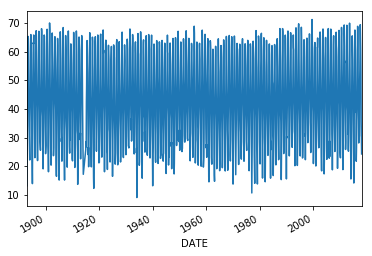

In [65]:
FinalTable.set_index('DATE')['TMIN_AVERAGE'].plot();

We can visualize our data but still it is a little hard to figure out how the temp. values are 
evolving across time
. Lets plot according to the monthly average values so it will be easier to figure out the change

In [66]:
# we already have our cleaned data in cleaned table
cleaned.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN,NewTAVG,NewTMAX,NewTMIN
2198,USC00366927,1893-01-01,2.62,21.1,30.0,12.3,default,default,default
841,USC00369464,1893-01-01,NaN,21.3,28.5,14.1,default,default,default
2199,USC00366927,1893-02-01,5.54,30.9,38.7,23.2,default,default,default
842,USC00369464,1893-02-01,6.13,30.2,38.0,NaN,default,default,default
843,USC00369464,1893-04-01,5.02,51.7,61.7,NaN,default,default,default


In [67]:
# checking how we can get the month values for each date

cleaned['DATE'].dt.month == 5

2198    False
841     False
2199    False
842     False
843     False
844      True
845     False
846     False
847     False
848     False
849     False
850     False
851     False
852     False
2200    False
2201    False
853     False
2202    False
854     False
855     False
2203    False
856      True
2204     True
2205    False
857     False
2206    False
858     False
2207    False
859     False
2208    False
        ...  
827     False
2193    False
3388    False
2194    False
828     False
2195    False
3389    False
829     False
2196    False
3390    False
830     False
2197    False
3391    False
831     False
832      True
3392     True
833     False
3393    False
3394    False
834     False
835     False
3395    False
836     False
3396    False
3397    False
837     False
838     False
3398    False
839     False
840     False
Name: DATE, Length: 3399, dtype: bool

Putting the months and their average values in seperate table and we do it for TAVG,TMAX and TMIN

In [68]:


arrayTAVG = []
arrayTMAX = []
arrayTMIN = []

for i in range(1, 13):
    
    mask = cleaned['DATE'].dt.month == i
    
    value1 = cleaned.loc[mask, 'TAVG']
    value2 = cleaned.loc[mask, 'TMAX']
    value3 = cleaned.loc[mask, 'TMIN']
    
    average1 = value1.sum()/value1.count()
    average2 = value2.sum()/value2.count()
    average3 = value3.sum()/value3.count()
    
    arrayTAVG.append([i, average1])
    arrayTMAX.append([i, average2])
    arrayTMIN.append([i, average3])

arrayTAVG

[[1, 31.116363636363637],
 [2, 32.60989010989011],
 [3, 41.48754716981132],
 [4, 52.13832116788321],
 [5, 62.247565543071154],
 [6, 71.12723880597014],
 [7, 75.81213235294118],
 [8, 74.02075471698113],
 [9, 67.18154981549814],
 [10, 55.72952029520295],
 [11, 45.10230769230769],
 [12, 34.927306273062726]]

We have all of our monthly average data so now we can add it to our new table

In [69]:
myData = pd.DataFrame(columns=["Month", "TAVG_average","TMAX_average", "TMIN_average"])
myData["Month"] = [arrayTAVG[i][0] for i in range(12)]
myData["TAVG_average"] = [arrayTAVG[i][1] for i in range(12)]
myData["TMAX_average"] = [arrayTMAX[i][1] for i in range(12)]
myData["TMIN_average"] = [arrayTMIN[i][1] for i in range(12)]


In [70]:
myData

,Month,TAVG_average,TMAX_average,TMIN_average
0,1,31.116364,39.830627,22.530292
1,2,32.609890,41.924820,23.507885
2,3,41.487547,51.803309,31.237868
3,4,52.138321,63.655720,40.651449
4,5,62.247566,73.930515,50.706204
5,6,71.127239,82.253731,60.054745
6,7,75.812132,86.436900,65.078545
7,8,74.020755,84.582721,63.373801
8,9,67.181550,78.039273,56.268953
9,10,55.729520,66.795956,44.601852


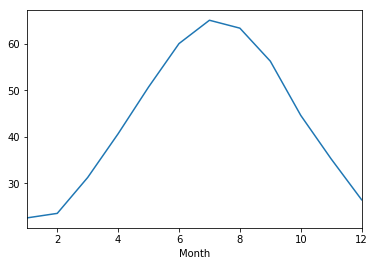

In [71]:
myData.set_index('Month')['TMIN_average'].plot();

Hmm, looks like we can now see the changes in temp. more clearly

Lets plot our final graph using all the average monthly values
# Final Graph:

Text(0, 0.5, 'Fahrenheit')

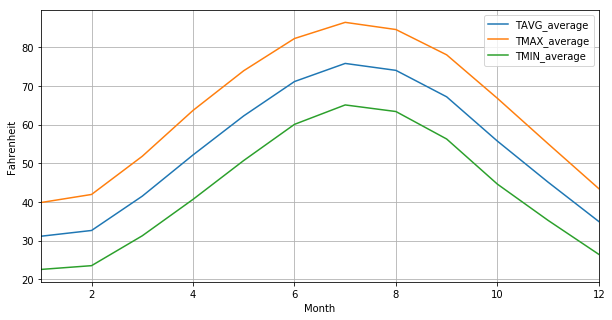

In [72]:
tempGraph = myData.set_index('Month').plot(figsize=(10,5), grid=True)
tempGraph.set_ylabel("Fahrenheit")